In [1]:
import roadrunner as rr
import matplotlib.pyplot as plt
import numpy as np
import bionetgen
import pandas as pd


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\Achyudhan\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Achyudhan\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "c:\Users\Achyudhan\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "c:\Users\Achyudhan\anacond

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\Achyudhan\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Achyudhan\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "c:\Users\Achyudhan\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "c:\Users\Achyudhan\anacond

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



In [54]:
# Load the SBML model
model = bionetgen.bngmodel("model_small.bngl")

In [55]:
# Check available methods and run the simulation
#print("Available methods:", [method for method in dir(model) if not method.startswith('_')])

# Setup and run the simulation
simulator = model.setup_simulator()
#print(f"Simulator type: {type(simulator)}")
#print("Simulator methods:", [method for method in dir(simulator) if not method.startswith('_')])

# Try to run the simulation
start = 0
end = 100
num_steps = 100
try:
    result = simulator.simulate(start=start, end=end, steps=num_steps)
    print(f"Simulation completed. Result type: {type(result)}")
    print(f"Result: {result}")
except Exception as e:
    print(f"Error with simulate: {e}")
    try:
        result = simulator.run(start=start, end=end, steps=num_steps)
        print(f"Run completed. Result type: {type(result)}")
        print(f"Result: {result}")
    except Exception as e2:
        print(f"Error with run: {e2}")
        print("Available simulator methods:")
        for method in dir(simulator):
            if not method.startswith('_'):
                print(f"  {method}")

Simulation completed. Result type: <class 'roadrunner._roadrunner.NamedArray'>
Result:     time, TGFbR_Active, IL6R_Active, JAK2_Active, SMAD3_P, STAT3_P_monomer, STAT3_Dimer, SMAD3_SMAD4_Complex, STAT3dimer_SMAD3_Complex, PKA_Active, CSK_Active,   P85_P, PI3K_Active_Complex, PIP3_conc, AKT_pS473, PTEN_Active, PTEN_Inactive, SOCS3_total
 [[    0,            0,           0,           0,       0,               0,           0,                   0,                        0,          0,          0,       0,                   0,         0,         0,         100,             0,           0],
  [    1,      57.7027,     57.7017,     22.5557, 98.9295,         56.1108,     42.7084,             38.0141,                  42.6878,    16.7092,     98.048, 99.0024,           0.0977521,   125.617,   135.948,    0.174829,       99.8252,    0.261548],
  [    2,      77.9905,     77.9894,     51.0191, 98.0906,         95.2254,     90.6963,              46.238,                  90.6592,     41.662,    97

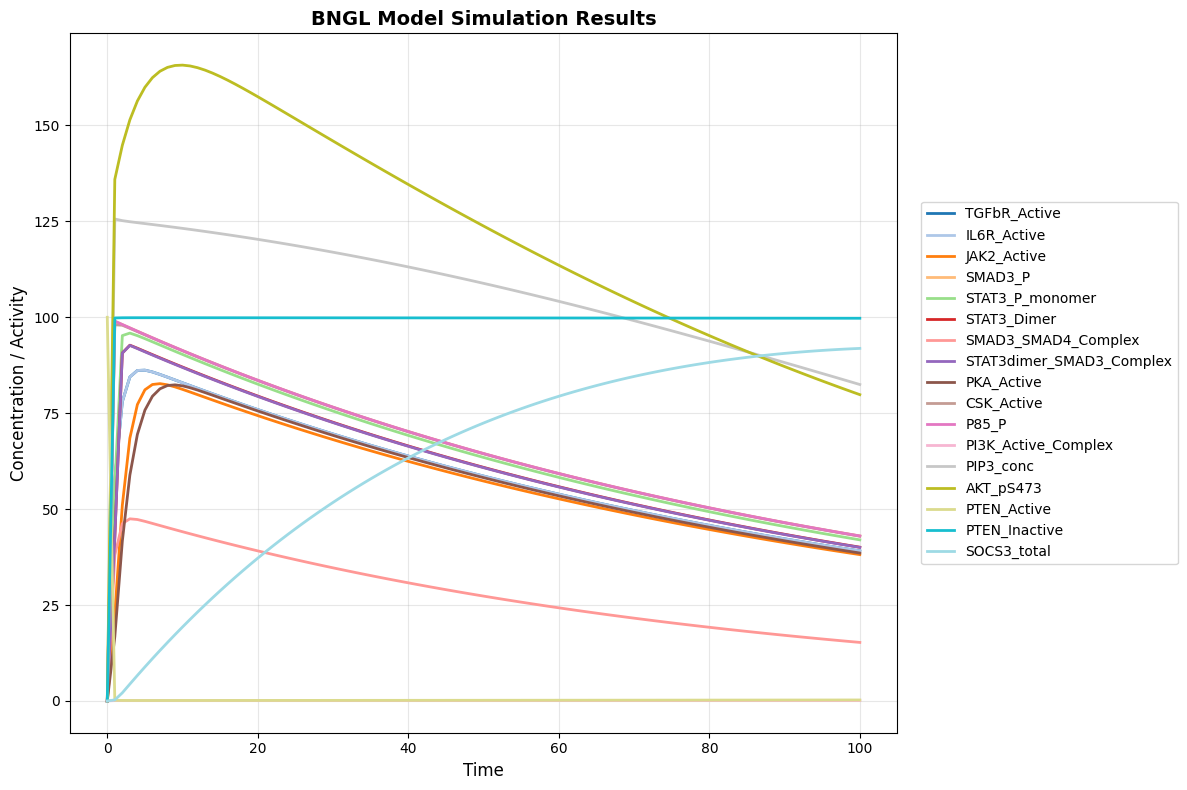

Plotted 17 species over 101 time points


In [57]:
# Check if we have simulation results and create plots
if 'result' in locals():
    # print(f"Simulation result type: {type(result)}")
    # print(f"Result shape: {result.shape if hasattr(result, 'shape') else 'No shape attribute'}")
    
    # Convert to DataFrame for plotting
    if hasattr(result, 'colnames'):
        # RoadRunner NamedArray format
        sim_df = pd.DataFrame(result, columns=result.colnames)
        sim_df = sim_df.set_index('time')
        # print(f"Created DataFrame with columns: {list(sim_df.columns)}")
        
        # Plot the results
        plt.figure(figsize=(12, 8))
        n_cols = len(sim_df.columns)
        colors = plt.cm.tab20(np.linspace(0, 1, n_cols))
        
        for i, col in enumerate(sim_df.columns):
            plt.plot(sim_df.index, sim_df[col], label=col, color=colors[i], linewidth=2)
        
        plt.xlabel('Time', fontsize=12)
        plt.ylabel('Concentration / Activity', fontsize=12)
        plt.title('BNGL Model Simulation Results', fontsize=14, fontweight='bold')
        plt.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), fontsize=10)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        print(f"Plotted {len(sim_df.columns)} species over {len(sim_df)} time points")
    else:
        print("Could not determine column structure of result")
else:
    print("No simulation result found")

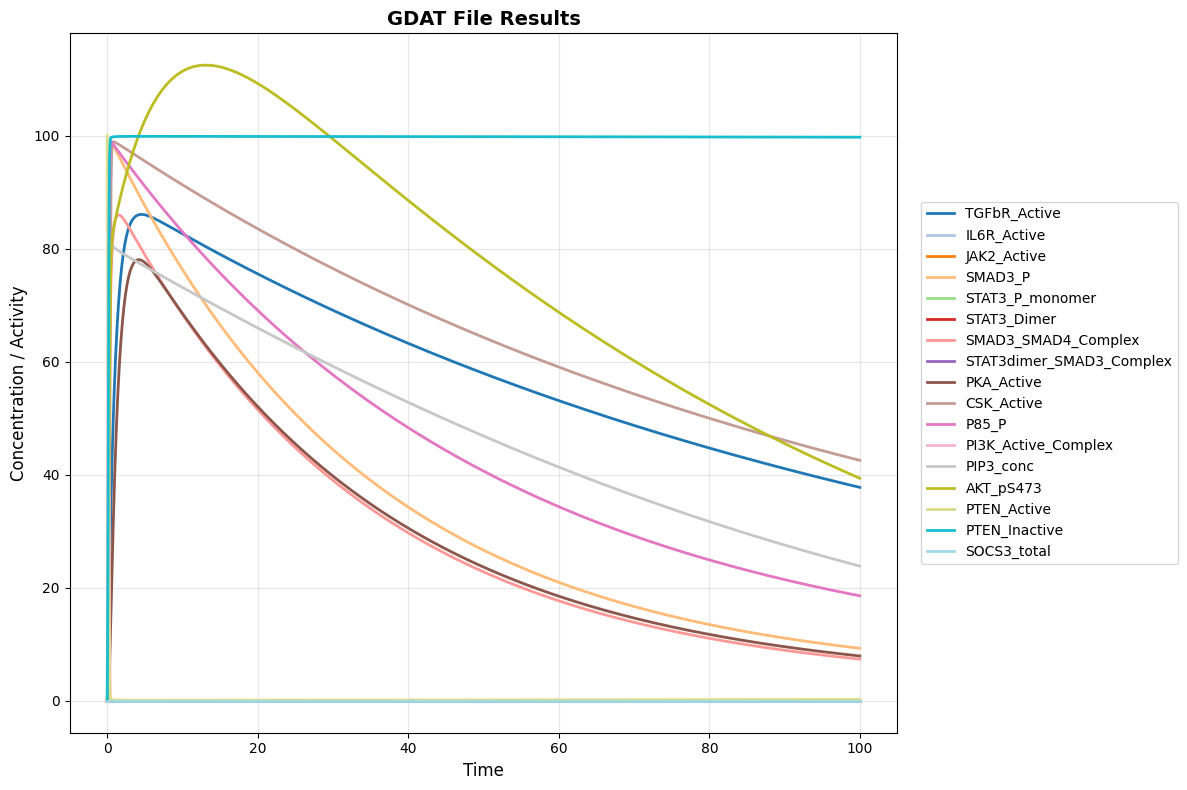

Plotted 17 species from GDAT file over 1001 time points


In [ ]:
# def load_and_preprocess_data(file_path):
#     """
#     Load and preprocess a .gdat data file:
#       - Grab the first “# …” line as the column names
#       - Skip any line starting with '#'
#       - Read all columns, including the very last one
#     Returns:
#       df: a DataFrame whose index is 'time'
#     """
#     # 1) Read header line
#     with open(file_path, 'r') as f:
#         for line in f:
#             if line.lstrip().startswith('#'):
#                 header = line.lstrip('#').split()
#                 break
#     # 2) Load the data, skipping comment lines, assigning our header
#     df = pd.read_csv(
#         file_path,
#         sep=r'\s+',
#         comment='#',
#         header=None,
#         names=header,
#     )
#     # 3) Make time the index
#     df['time'] = df['time'].astype(float)
#     return df.set_index('time')

# def plot_gdat(df, figsize=(12,8), cmap_name='tab20'):
#     """
#     Plot all columns in df versus its index (time), with unique colors and legend.
    
#     Args:
#       df          : DataFrame indexed by time
#       figsize     : size of the figure
#       cmap_name   : name of a matplotlib colormap (e.g. 'tab20', 'hsv', 'jet')
#     """
#     n = len(df.columns)
#     cmap = plt.get_cmap(cmap_name, n)          # discrete colormap with n distinct colors
#     colors = [cmap(i) for i in range(n)]       # pick each color

#     plt.figure(figsize=figsize)
#     for (col, color) in zip(df.columns, colors):
#         plt.plot(df.index, df[col], label=col, color=color, linewidth=2)

#     plt.xlabel('Time', fontsize=12)
#     plt.ylabel('Concentration / Activity', fontsize=12)
#     plt.title('GDAT File Results', fontsize=14, fontweight='bold')
#     plt.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), fontsize=10)
#     plt.grid(True, alpha=0.3)
#     plt.tight_layout()
#     plt.show()

# path = "model_small/2025_06_23__12_53_22/model_small.gdat"
# df = load_and_preprocess_data(path)
# plot_gdat(df, cmap_name='tab20')   # improved legend and formatting
# print(f"Plotted {len(df.columns)} species from GDAT file over {len(df)} time points")

In [ ]:
import os

# Create a directory for the simulation data and plots if it doesn't exist
if not os.path.exists("SimData"):
    os.makedirs("SimData")

model_path = "model_even_smaller/2025_06_25__15_46_31/model_even_smaller.bngl"

parameter_name = 'IL6_0' # Or whatever your BNGL parameter for initial IL-6 is

conditions = {
    "TH17": 100.0,  # High IL-6 ligand
    "Treg": 0.0     # No IL-6 ligand
}

simulation_results = {}
start_time = 0
end_time = 100
num_steps = 100

# --- Running Simulations for Each Condition ---
try:
    for condition, value in conditions.items():
        print(f"--- Running simulation for {condition} condition ({parameter_name} = {value}) ---")
        # Load the model fresh for each simulation to ensure conditions don't leak
        model = bionetgen.bngmodel(model_path)

        # Check if the parameter exists in the model
        if parameter_name not in model.parameters:
            raise ValueError(f"Parameter '{parameter_name}' not found in the model. Please check your BNGL file.")

        # Set the parameter for the initial concentration of IL6(r)
        model.parameters[parameter_name].value = value
        print(f"Set parameter '{parameter_name}' to {model.parameters[parameter_name].value}")

        # Set up and run the simulation
        simulator = model.setup_simulator()
        result = simulator.simulate(start=start_time, end=end_time, steps=num_steps)

        # Store the results in a DataFrame
        sim_df = pd.DataFrame(result, columns=result.colnames)
        sim_df = sim_df.set_index('time')
        simulation_results[condition] = sim_df
        print(f"Simulation for {condition} completed.")

except FileNotFoundError:
    print("Error: 'model_even_smaller.bngl' not found. Please ensure this file is in the correct directory.")
    simulation_results = None
except ValueError as ve:
    print(f"Error: {ve}")
    simulation_results = None

# --- Saving the Results to Excel ---
if simulation_results:
    output_filename = "SimData/simulation_results.xlsx"
    with pd.ExcelWriter(output_filename, engine='xlsxwriter') as writer:
        print(f"\nSaving combined simulation results to '{output_filename}'...")

        # Get a list of all unique species from all simulations
        all_species = set()
        for df in simulation_results.values():
            all_species.update(df.columns)

        # Create a sheet for each species
        for species in sorted(list(all_species)):
            # Create a new DataFrame for the combined results of this species
            combined_df = pd.DataFrame()
            # Use the time from one of the simulations (should be the same for all)
            combined_df['Time'] = simulation_results['TH17'].index

            # Add a column for each condition
            for condition, result_df in simulation_results.items():
                if species in result_df:
                    combined_df[condition] = result_df[species].values
                else:
                    combined_df[condition] = 0 # or np.nan

            # Write the combined DataFrame to a sheet named after the species
            combined_df.to_excel(writer, sheet_name=species, index=False)

    print("Excel file saved successfully.")

    # --- Plotting the Results ---
    print("Generating plots...")
    for species in sorted(list(all_species)):
        plt.figure(figsize=(10, 6))
        for condition, result_df in simulation_results.items():
            if species in result_df:
                plt.plot(result_df.index, result_df[species], label=f'{condition} (IL6(r)={conditions[condition]})')

        plt.xlabel('Time', fontsize=12)
        plt.ylabel('Amount', fontsize=12)
        plt.title(f'Simulation of {species}', fontsize=14, fontweight='bold')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plot_filename = f"SimData/{species}_comparison_plot.png"
        plt.savefig(plot_filename)
        plt.close() # Close the figure to free up memory

    print("Plots generated and saved in the 'SimData' directory.")

--- Running simulation for TH17 condition (IL6_0 = 100.0) ---
Set parameter 'IL6_0' to 100.0
Simulation for TH17 completed.
--- Running simulation for Treg condition (IL6_0 = 0.0) ---
Set parameter 'IL6_0' to 0.0
Simulation for Treg completed.

Saving combined simulation results to 'SimData/simulation_results.xlsx'...
Excel file saved successfully.
Generating plots...
Plots generated and saved in the 'SimData' directory.
